In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from vismodel.visualize import Vismodule

# サンプルデータの準備
seq_length = 20
time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1))  # (21, 1)の形状にリサイズ

# データをテンソルに変換
x = data[:-1]  # 入力系列
y = data[1:]   # 出力系列

x = torch.tensor(x, dtype=torch.float32).unsqueeze(-1)  # 入力系列をテンソルに変換
y = torch.tensor(y, dtype=torch.float32)            # 出力系列をテンソルに変換

print(x.shape,y.shape)
# RNNの定義
class RNN(Vismodule):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# ハイパーパラメータ
input_size = 1   # 入力の次元
hidden_size = 32 # LSTMの隠れ層の次元
output_size = 1  # 出力の次元
num_layers = 2   # LSTMのレイヤー数
num_epochs = 100
learning_rate = 0.01

# モデル、損失関数、オプティマイザの定義
model = RNN(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# モデルのトレーニング
"""
rnn = nn.RNN(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(input, h0)
"""
for epoch in range(num_epochs):
    outputs = model(x)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


torch.Size([20, 1, 1]) torch.Size([20, 1])
Epoch [10/100], Loss: 0.0743
Epoch [20/100], Loss: 0.0449
Epoch [30/100], Loss: 0.0132
Epoch [40/100], Loss: 0.0151
Epoch [50/100], Loss: 0.0133
Epoch [60/100], Loss: 0.0126
Epoch [70/100], Loss: 0.0123
Epoch [80/100], Loss: 0.0123
Epoch [90/100], Loss: 0.0123
Epoch [100/100], Loss: 0.0123


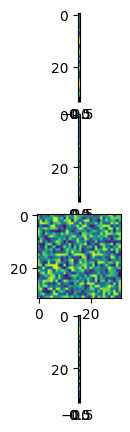

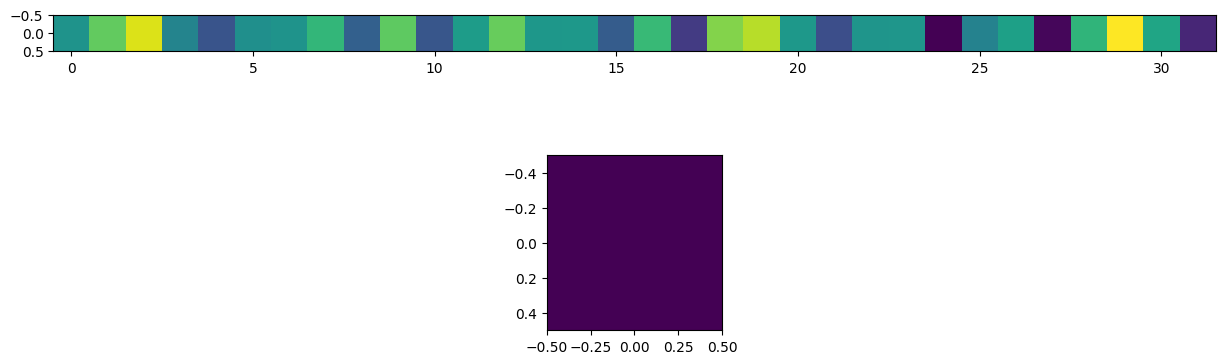

In [8]:
model.visualize_wandb()

In [ ]:
# モデルの評価
model.eval()
with torch.no_grad():
    future = 50
    pred = torch.zeros(seq_length + future, 1)

    print(pred.shape,x.shape)
    pred[:seq_length] = x.view(-1)

    for i in range(seq_length, seq_length + future):
        pred[i] = model(pred[i-seq_length:i].view(1, seq_length, 1))

    plt.plot(time_steps, data, 'b-', label='Actual')
    plt.plot(time_steps, pred.numpy(), 'r-', label='Predicted')
    plt.legend()
    plt.show()

In [5]:
rnn = nn.RNN(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(input, h0)

In [6]:
rnn.state_dict()

OrderedDict([('weight_ih_l0',
              tensor([[ 0.0579,  0.1503, -0.0970,  0.0629, -0.0189, -0.1818, -0.0984,  0.1499,
                        0.0165,  0.1175],
                      [-0.1530, -0.1080, -0.0685, -0.0292,  0.0578,  0.0137, -0.1159, -0.0250,
                        0.1446,  0.0597],
                      [ 0.0287,  0.0069, -0.0086,  0.0597, -0.0116, -0.0891,  0.1601, -0.0390,
                        0.1814, -0.0533],
                      [-0.1138, -0.1562,  0.0325,  0.1717, -0.1892,  0.1756, -0.2048,  0.2136,
                        0.1531, -0.0041],
                      [-0.0949,  0.0333, -0.2213, -0.2154, -0.1667,  0.0108, -0.2027,  0.0632,
                       -0.0203,  0.0889],
                      [ 0.1996, -0.0736,  0.2086, -0.1335,  0.1544,  0.1134,  0.2142,  0.0439,
                       -0.2193, -0.1406],
                      [ 0.0473,  0.0783,  0.0609, -0.1666,  0.1507,  0.1546,  0.0932, -0.2012,
                       -0.0624,  0.1676],
           

In [11]:
rnn.weight_ih_l0.shape

torch.Size([20])

In [22]:
rnn = nn.GRU(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(input, h0)

In [23]:
rnn.state_dict().keys()

odict_keys(['weight_ih_l0', 'weight_hh_l0', 'bias_ih_l0', 'bias_hh_l0', 'weight_ih_l1', 'weight_hh_l1', 'bias_ih_l1', 'bias_hh_l1'])